# Train/test splitting

> First, we need to hold out some data in order to evaluate how well the machine learning models we build generalize with new data.
> This is called splitting the data into a training and testing set.

In [ ]:
# | default_exp train_test_split


In [ ]:
# | hide
from nbdev.showdoc import *
from fastcore.test import *


When splitting our data, we want to make sure the training set is representative of the cases we want to generalize to. Otherwise, we would train machine learning models that would not make accurate predictions.
That is why we need to make sure the distribution of key features correlated to our target are preserved in the test set. By doing so, we are evaluating our machine learning models against representative data and hence, we can trust the quality of our models' predictions.

Splitting the data in this manner is called _stratified sampling_. To do so, we need to have a look at how each feature is correlated to our target (_house_median_value_). 
<br>This is what we will do now.

### Correlation matrix

In [ ]:
# | hide
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns


In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
plt.style.use("ggplot")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(color=["#1f77b4", "red"])


In [ ]:
# | export
# | hide
def get_project_path() -> Path:
    """
    Get the path of the root project
    """
    return Path.cwd().parent.resolve()


In [ ]:
# | hide
get_project_path()


Path('/Users/brice/Documents/Data Science journey/housing-ageron-nbdev')

In [ ]:
# | hide
test_eq(str(get_project_path()).split("/")[-1], "housing-ageron-nbdev")


In [ ]:
# Load the data
df_housing_raw = pd.read_excel(get_project_path() / "data" / "raw" / "housing.xlsx")
df_housing_raw.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# | export
# | hide
def plot_correlation(
    df: pd.DataFrame,  # dataframe for which to plot the correlation matrix
):
    '''
    Plot a correlation matrix
    '''
    fig, ax = plt.subplots(figsize=(20, 10))
    corr = df.corr(numeric_only=True)
    ax = sns.heatmap(corr, square=True, ax=ax, annot=True, cmap="coolwarm")
    ax.set_title("Correlation of each feature")
    plt.tight_layout()
    plt.show()


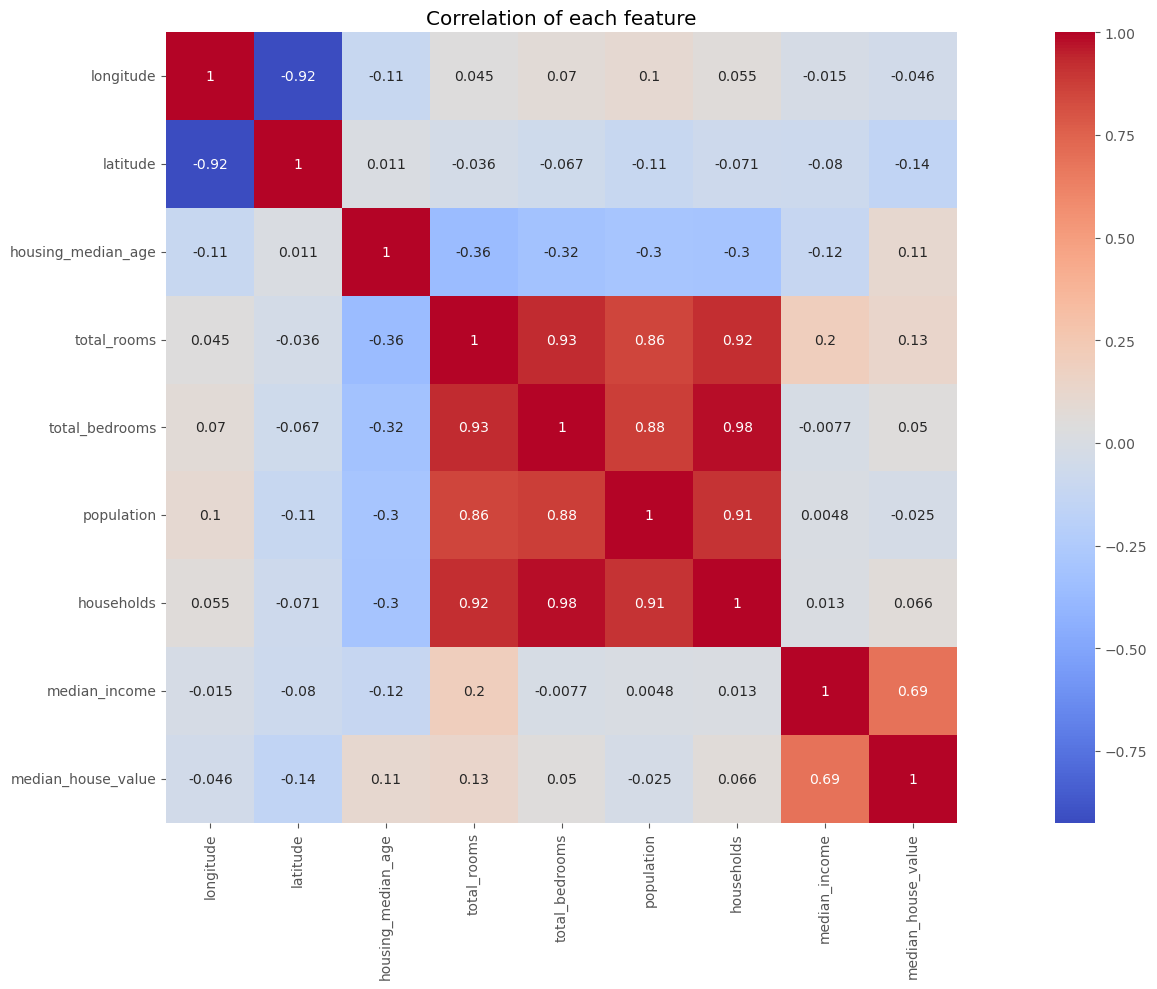

In [ ]:
plot_correlation(df_housing_raw)

Our target is _median_house_value_. We can see that _median_income_ is strongly correlated to it. We can use it to stratify our train/test splitting.


In [ ]:
# | hide
import nbdev

nbdev.nbdev_export()
